# 백준 3425(https://www.acmicpc.net/problem/3425)

고창영은 스택을 조금 변형해서 고스택을 만들었다.

고스택은 숫자만을 저장할 수 있고, 다음과 같은 10가지 연산을 수행할 수 있다.

편의상 스택의 가장 위에 저장된 수를 첫 번째 수라고 하고, 그 다음은 차례대로 두 번째 수, 세 번째 수라고 한다.

- NUM X: X를 스택의 가장 위에 저장한다. (0 ≤ X ≤ 109)
- POP: 스택 가장 위의 숫자를 제거한다.
- INV: 첫 번째 수의 부호를 바꾼다. (42 -> -42)
- DUP: 첫 번째 숫자를 하나 더 스택의 가장 위에 저장한다.
- SWP: 첫 번째 숫자와 두 번째 숫자의 위치를 서로 바꾼다.
- ADD: 첫 번째 숫자와 두 번째 숫자를 더한다.
- SUB: 첫 번째 숫자와 두 번째 숫자를 뺀다. (두 번째 - 첫 번째)
- MUL: 첫 번째 숫자와 두 번째 숫자를 곱한다.
- DIV: 첫 번째 숫자로 두 번째 숫자를 나눈 몫을 저장한다. 두 번째 숫자가 피제수, 첫 번째 숫자가 제수이다.
- MOD: 첫 번째 숫자로 두 번째 숫자를 나눈 나머지를 저장한다. 두 번째 숫자가 피제수, 첫 번째 숫자가 제수이다.

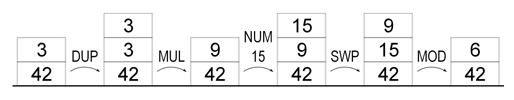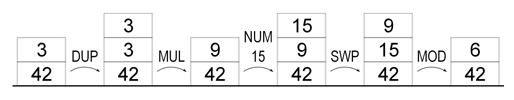

이항 연산자의 경우에 첫 번째 숫자가 오른쪽에 있는 수이고, 두 번째 숫자가 왼쪽에 있는 수이다. 또, 연산을 수행하기 전에 두 숫자를 모두 스택에서 제거한 뒤, 결과를 다시 스택에 저장하는 것이다.

숫자가 부족해서 연산을 수행할 수 없을 때, 0으로 나눴을 때 (DIV, MOD), 연산 결과의 절댓값이 109를 넘어갈 때는 모두 프로그램 에러이다.

음수 나눗셈에 대한 모호함을 피하기 위해 다음과 같이 계산한다. 나눗셈의 피연산자에 음수가 있을 때는, 그 수를 절댓값을 씌운 뒤 계산한다. 그리고 나서 몫과 나머지의 부호는 다음과 같이 결정한다. 피연산자중 음수가 한 개일때는 몫의 부호가 음수이다. 이 경우를 제외하면 몫의 부호는 항상 양수이다. 나머지의 부호는 피제수의 부호와 같다. 따라서, 13 div -4 = -3, -13 mod 4 = -1, -13 mod -4 = -1이다.

프로그램 에러가 발생했을 경우에는, 현재 프로그램의 수행을 멈추고, 그 다음 어떤 명령도 수행하지 않는다.질량의 합을 구해보자.음과 같다.

> 입력: 입력은 기계 여러 대의 설명으로 이루어져 있다. 각 기계의 설명은 프로그램과 입력영역으로 나누어져 있다. 프로그램은 명령어로 이루어져 있고, 명령어는 한 줄에 하나씩 있다. 각 명령은 문제 설명에 나와있는 대문자 알파벳 3글자이고, 다른 글자는 주어지지 않는다. NUM의 경우에는 명령어 다음에 숫자가 주어지며, 이 숫자는 0보다 크거나 같고, 109보다 작거나 같은 정수이다. NUM과 숫자는 공백으로 구분되어져 있다. 각 프로그램은 END가 나오면 끝난다. 입력영역은 첫째 줄에 프로그램 수행 횟수 N이 있다. (0 ≤ N ≤ 10,000) 다음 N개의 줄에는 한 줄에 하나씩 입력값 Vi가 있다. (0 ≤ Vi ≤ 109) 각 입력값에 대해서 프로그램을 한 번씩 수행해야 하고, 이 수행은 모두 독립적이다. 매번 프로그램을 수행할 때, 스택에 들어있는 값은 입력값 Vi 하나이다. 각각의 기계 설명은 빈 줄로 구분되어져 있다. QUIT이 나오면 다음 기계 설명이 없다는 뜻이다. 명령어가 100,000개를 넘어가는 경우와 스택이 수행될 때, 1,000개 이상의 숫자를 저장하는 경우는 없다.

> 출력: 각각의 입력값에 대해서, 해당하는 프로그램을 수행한 뒤, 출력값을 출력하면 된다. 출력값이란 스택에 저장되어 있는 숫자이다. 만약, 프로그램 에러가 발생하거나, 모든 수행이 종료됐을 때 스택에 저장되어 있는 숫자가 1개가 아니라면, "ERROR"를 출력한다. 각 기계에 대한 출력값을 모두 출력한 뒤에는 빈 줄을 하나 출력해야 한다.

## 1. Python solution1

In [ ]:
import sys

def gostack(commands, num):
    stack = [num]
    for cmd in commands:
        if cmd[:3] == "NUM":
            n = int(cmd[4:])
            stack.append(n)
        elif not stack:
            return "ERROR"
        elif cmd == "POP":
            stack.pop()
        elif cmd == "INV":
            stack[-1] *= -1
        elif cmd == "DUP":
            stack.append(stack[-1])
        elif len(stack) == 1:
            return "ERROR"
        elif cmd == "SWP":
            stack[-1], stack[-2] = stack[-2], stack[-1]
        elif cmd == "ADD":
            temp = stack.pop() + stack.pop()
            if abs(temp) > 10 ** 9:
                return "ERROR"
            stack.append(temp)
        elif cmd == "SUB":
            temp = -stack.pop() + stack.pop()
            if abs(temp) > 10 ** 9:
                return "ERROR"
            stack.append(temp)
        elif cmd == "MUL":
            temp = stack.pop() * stack.pop()
            if abs(temp) > 10 ** 9:
                return "ERROR"
            stack.append(temp)
        elif cmd == "DIV":
            a, b = stack.pop(), stack.pop()
            if a == 0:
                return "ERROR"
            temp = abs(b) // abs(a)
            if (a > 0 and b < 0) or (a < 0 and b > 0):
                temp = -temp
            if abs(temp) > 10 ** 9:
                return "ERROR"
            stack.append(temp)
        elif cmd == "MOD":
            a, b = stack.pop(), stack.pop()
            if a == 0:
                return "ERROR"
            temp = abs(b) % abs(a)
            if b < 0:
                temp = -temp
            if abs(temp) > 10 ** 9:
                return "ERROR"
            stack.append(temp)
        else:
            return "ERROR"

    if len(stack) == 1:
        return stack[0]
    return 'ERROR'

while True:
    commands = []
    while True:
        cmd = input().strip()
        if cmd == "QUIT":
            quit()
        if cmd == "END":
            break
        commands.append(cmd)

    n = int(input())
    for _ in range(n):
        num = int(input())
        print(gostack(commands, num))
    print()
    input()  # 줄바꿈 삭제

 DUP
 MUL
 NUM 2
 ADD
 END
 3
 1


3


 10


102


 50


2502



 NUM 1
 NUM 1
 ADD
 END
 2
 42


43


 43


44



 NUM 600000000
 ADD
 END
 3
 0


ERROR


 600000000


ERROR


 1


ERROR



 
 QUIT
